# UC San Diego: Neural Data Science
## Final Project Title (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Eric Silberman
- Olimpia Carrioli

# Overview

* Write a clear, 3-4 sentence summary of what you did and why.

<a id='research_question'></a>
# Research Question

* One sentence that describes the question you address in your project. Make sure what you’re measuring (variables) to answer your question is clear!


<a id='background'></a>

## Background & Prior Work

* In 2-3 paragraphs, describe the motivation behind your question. What’s the big picture, and why is it interesting? Are there published papers addressing aspects of your question? You should cite at least three primary references here. You are welcome to replicate published papers using publicly available data, just cite them and explain why!

References (include links):
- 1)
- 2)

# Hypothesis


Do patients with the following psychiatric conditions: Depression, Personality disorders, Anxiety disorders, Schizophrenia, Eating disorders, and Addictive behaviors differ in their brain activation patterns as measured by resting-state EEG? 

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [25]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_eeg=pd.read_csv('EEG.machinelearing_data_BRMH.csv')

In [4]:
df_eeg.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [5]:
df_eeg.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

# Data Cleaning

* Describe your data cleaning steps here.

1. Drop non-eeg columns
2. Check for missing values, in case drop/fill in with median value
3. Count how many observations per main disorder
4. Calculate summary statistics (mean, median, mode, standard deviation) for numerical features like age, IQ, and EEG measurements.
5. Outlier Detection using z-score

In [6]:
# drop non-eeg columns, including specific disorder 
cols_to_drop = ['sex', 'age', 'eeg.date', 'education', 'IQ', 'specific.disorder', 'Unnamed: 122']
df = df_eeg.copy().drop(cols_to_drop, axis=1)
df.head()

,no.,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,Addictive disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,Addictive disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,Addictive disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,Addictive disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,Addictive disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [7]:
# check for missing values
print(f'Total number of missing entries: {df.isnull().sum().sum()}')

missing_values = df.isnull().sum()
for column, missing in missing_values.items():
    if missing > 0:
        print(f'{column}: {missing}')

Total number of missing entries: 0


In [8]:
# Count observations per each main disorder category

count_observations = pd.DataFrame(df['main.disorder'].value_counts())
count_observations

,count
main.disorder,
Mood disorder,266
Addictive disorder,186
Trauma and stress related disorder,128
Schizophrenia,117
Anxiety disorder,107
Healthy control,95
Obsessive compulsive disorder,46


# Data Visualization

* This is a good place for some relevant visualizations related to any exploratory data anlayses (EDA) you did after the basic cleaning.
* 
https://www.kaggle.com/code/lazygene/visualising-pre-processed-eeg-data


## Planned Graphs
1. Brain plot of eeg AB (power) columns per disorder, per wave length
2. Electrode vs Electrode Heatmap of functional connectivity between each pair of electrode
3. One plot per disorder - distribution of AB values where one line represents one wave length


### Graph #1 - Brain plot

- First Step: Electrode Positions
    - This will be used to visualize a region based on the the electrode placement. 
- Second Step: All Bands for each Main Disorder
    - Pre-process: Get Main Disorders and the respective mean eeg AB (power) 
    - Format: (XXX) rows x 6 columns(delta, theta, alpha, beta, high beta, gamma)
- Third Step: Create Visualization 
    - Create a function to print the graphs out.
  
### Graph #2 - Function Connectivity Heat Map
 - ROI vs ROI: COH data column. 

### Graph #3 - Distribution of Mean Absolute Power of wave types by main disorder
- First Step: Filter Columns
    - Filer columns to include only absolute power values. These are columns starting with AB
- Second Step: Define columns for each wave types
    - Create a dictionary with keys the columns of the dataframe, and values which type of wave the column is recording. {'AB.A.delta.a.FP1': 'delta', 'AB.A.delta.b.FP2': 'delta'}
- Third Step: Calculate means
    - Define a function to calculate the mean for each wave type across electrodes
- Fourth Step: Plot
    - Iterate over the main disorders
    - Define a dataframe containing information for the given disorder only
    - Calculate the mean for each wave type across electrodes 
    - Plot the kernel density of all the wave types for the current disorder on one plot

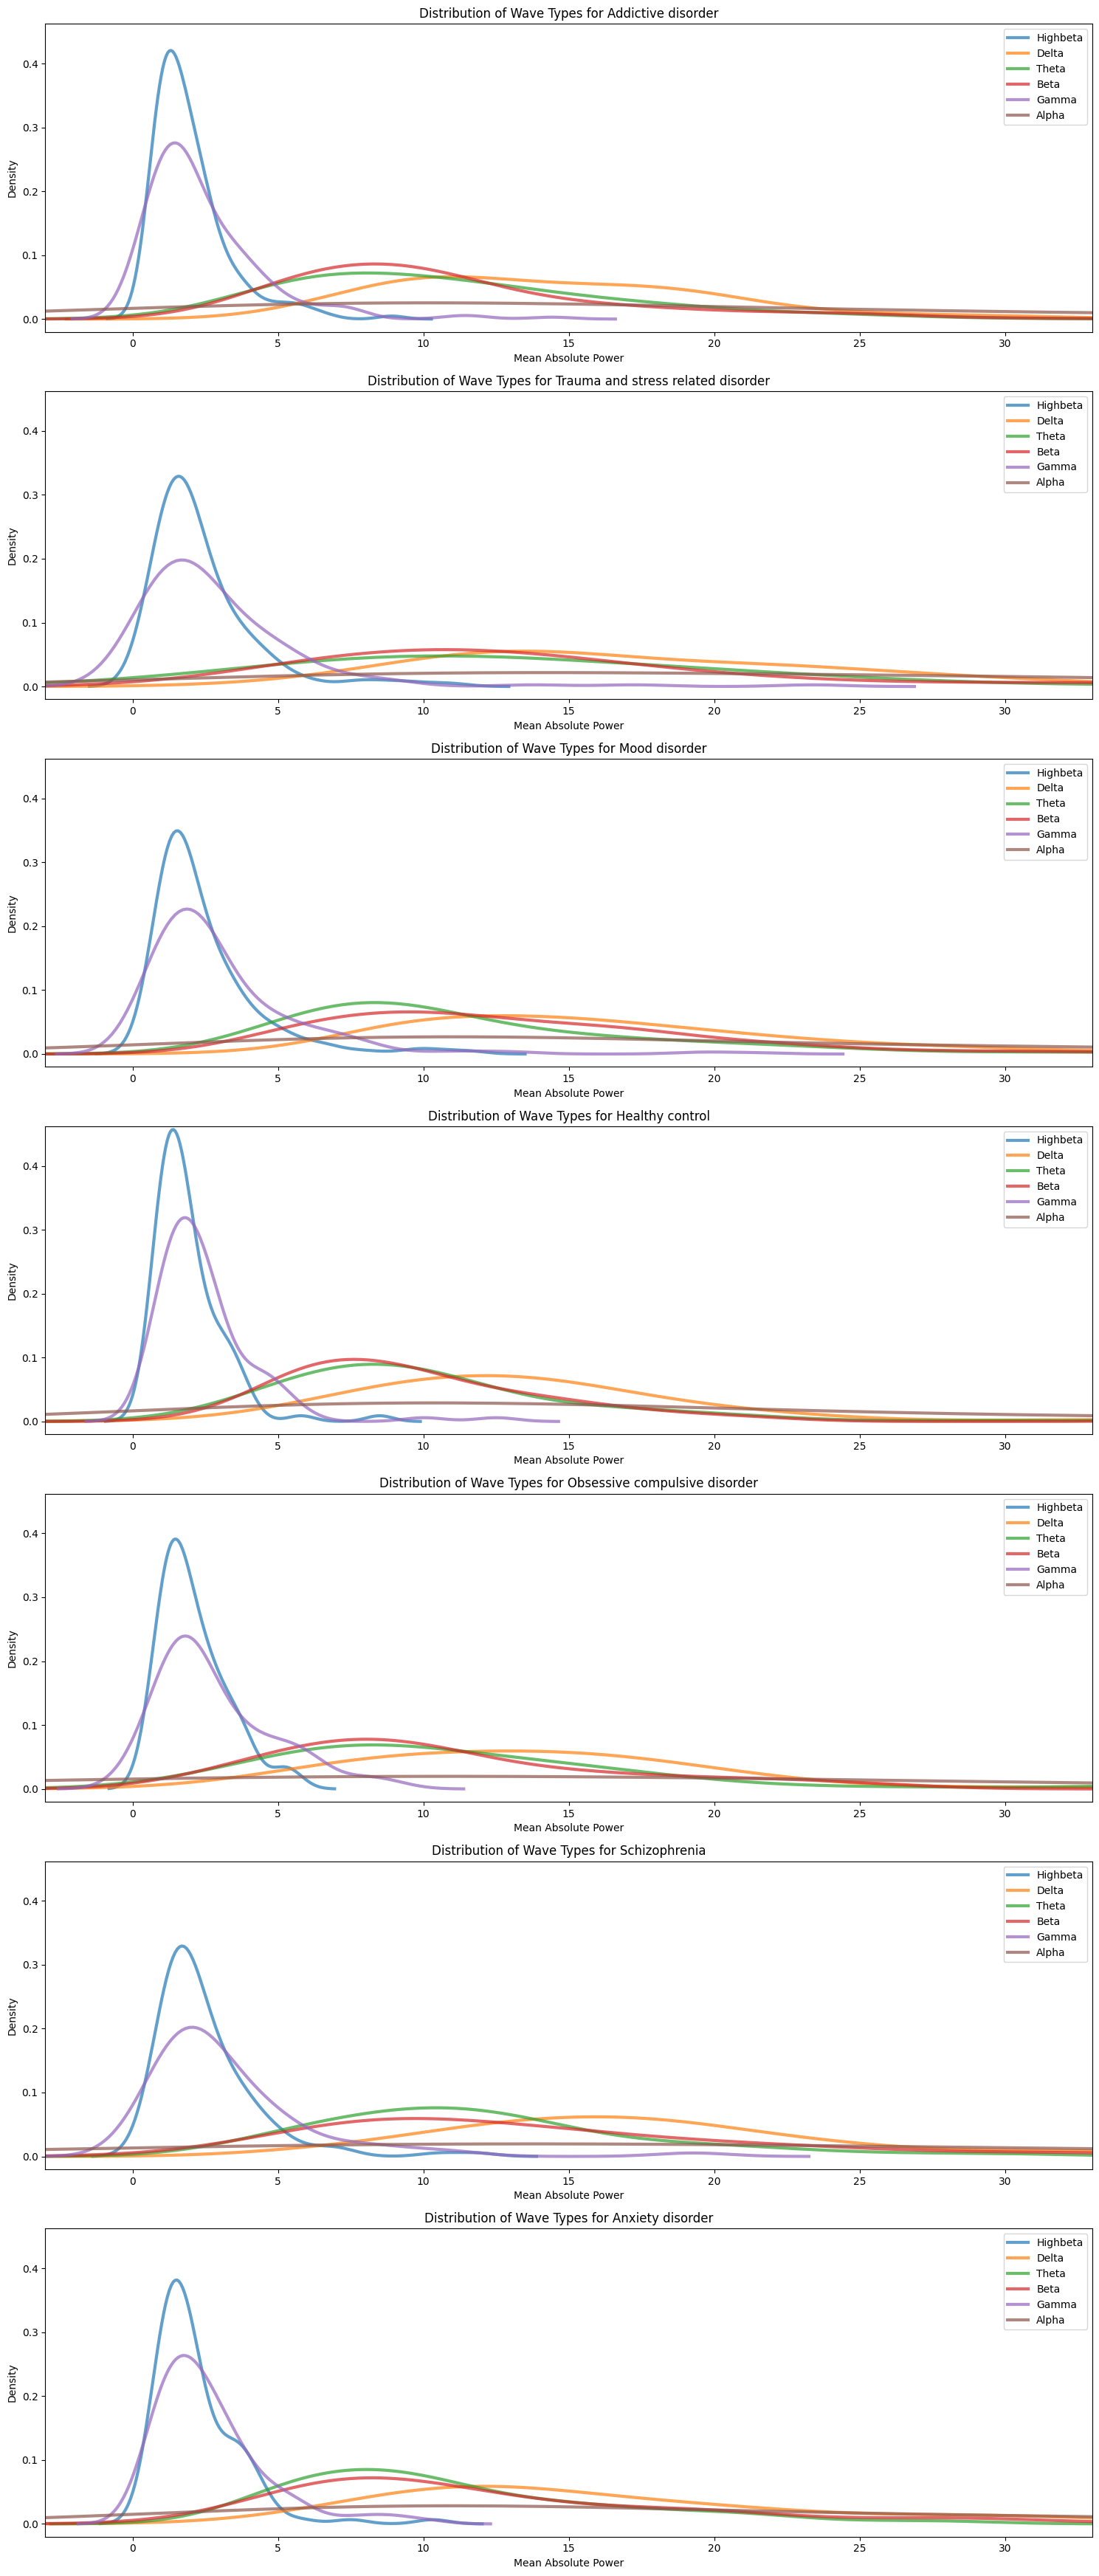

In [47]:
# Filter columns that start with "AB"
ab_columns = [col for col in df.columns if col.startswith('AB')]

# define wave types
def get_wave_type(col_name):
    parts = col_name.split('.')
    return parts[2] if len(parts) > 2 else 'unknown'
wave_types = {col: get_wave_type(col) for col in ab_columns}
# Plotting function
def calculate_mean(df):
    wave_summaries = {}
    for wave_type in set(wave_types.values()):
        cols_to_plot = [col for col, wave in wave_types.items() if wave == wave_type]
        if cols_to_plot:
            wave_summaries[wave_type] = df[cols_to_plot].mean(axis=1)
    return wave_summaries

fig, axes = plt.subplots(7, 1, figsize=(15, 35))
# Iterate over each main.disorder
for i, disorder in enumerate(df['main.disorder'].unique()):
    df_disorder = df[df['main.disorder'] == disorder]
    wave_summaries = calculate_mean(df_disorder)
    
    for wave_type, values in wave_summaries.items():
        sns.kdeplot(values, label=wave_type.capitalize(), fill=False, alpha=0.7, ax=axes[i], linewidth=3)
    axes[i].set_xlim(-3, 33)  
    axes[i].set_ylim(-0.02, 0.462)
    axes[i].set_title(f'Distribution of Wave Types for {disorder}')
    axes[i].set_xlabel('Mean Absolute Power')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Data Analysis & Results

* Include cells that describe the steps in your data analysis.
* You'll likely also have some visualizations here as well.

In [1]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## PCA and Clustering

# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Discussed limitations of your analyses.
* You can also discuss future directions you'd like to pursue.